# what is the probability that a randomly selected movie will have a runtime of over 2.4 hours?

Theoretical Probability (runtime > 2.4 hrs): 0.0256
Z-score for 2.4 hrs: 1.95
Empirical Probability (runtime > 2.4 hrs): 0.0670


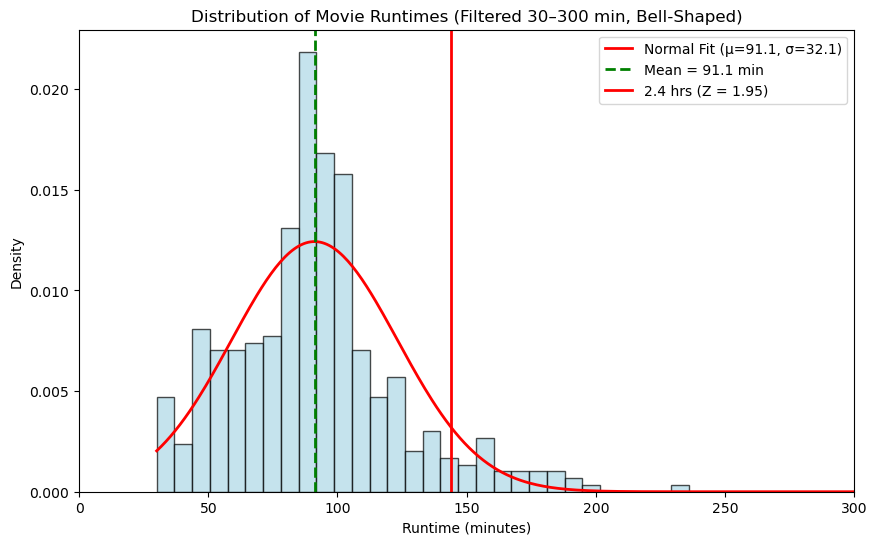

In [5]:
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Theoretical Probability ---
mean_runtime = 105   # average runtime in minutes
std_runtime = 20     # standard deviation in minutes
threshold = 144      # 2.4 hours = 144 minutes

# Z-score and theoretical probability
z = (threshold - mean_runtime) / std_runtime
theoretical_prob = 1 - norm.cdf(z)
print(f"Theoretical Probability (runtime > 2.4 hrs): {theoretical_prob:.4f}")
print(f"Z-score for 2.4 hrs: {z:.2f}")

# --- API Setup ---
api_key = "a6f4bbad3dbf97c80562098423bd79a6"
base_url = "https://api.themoviedb.org/3/movie/"
headers = {
    "Authorization": (
        "Bearer "
        "eyJhbGciOiJIUzI1NiJ9."
        "eyJhdWQiOiJhNmY0YmJhZDNkYmY5N2M4MDU2MjA5ODQyM2JkNzlhNiIsIm5iZiI6MTc2MjE4NzYxNC4wMTMs"
        "InN1YiI6IjY5MDhkOTVlOWEzOTY5ZTRhODU5ODcwZiIsInNjb3BlcyI6WyJhcGlfcmVhZCJdLCJ2ZXJzaW9uIjoxfQ."
        "rT9msa-8Ig0qm_LRyF5ZlY-tE0twywokrZLDkLIQdxk"
    ),
    "accept": "application/json"
}

# --- Function to get random movie runtime ---
def get_random_movie_runtime():
    movie_id = random.randint(1, 1000000)
    response = requests.get(f"{base_url}{movie_id}", headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data.get("runtime", None)
    return None

# --- Collect data ---
runtimes = []
for _ in range(1000):
    rt = get_random_movie_runtime()
    if rt is not None and 30 <= rt <= 300:  # realistic runtime range
        runtimes.append(rt)

# Convert to NumPy array
runtimes = np.array(runtimes)

# --- Empirical Probability ---
empirical_prob = np.mean(runtimes > threshold)
print(f"Empirical Probability (runtime > 2.4 hrs): {empirical_prob:.4f}")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.hist(
    runtimes,
    bins=30,
    density=True,
    color='lightblue',
    edgecolor='black',
    alpha=0.7
)

# Fit and plot normal curve
mu, sigma = np.mean(runtimes), np.std(runtimes)
x = np.linspace(30, 300, 300)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2,
         label=f"Normal Fit (μ={mu:.1f}, σ={sigma:.1f})")

# Add mean and threshold lines
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label=f"Mean = {mu:.1f} min")
plt.axvline(threshold, color='red', linestyle='-', linewidth=2, label=f"2.4 hrs (Z = {z:.2f})")

plt.xlim(0, 300)
plt.title("Distribution of Movie Runtimes (Filtered 30–300 min, Bell-Shaped)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()


Theoretical Probability (runtime > 2.4 hrs): 0.0256
Z-score for 2.4 hrs: 1.95
Empirical Probability  after 1000 samples = 0.0535